# Loading Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
import plotly.express as px
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

#train-test-split
from sklearn.model_selection import train_test_split

#scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

#downsample / upsample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

#different classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#error metrics
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#chi2
from itertools import combinations
from scipy.stats import chi2_contingency

#import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
data = pd.read_csv(r'C:/Users/josefin/01_IRONHACK/Week9/1_dataset/IBM_HR_Analytics.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis (EDA) & Data Cleaning

## DataFrame Shape

In [3]:
data.shape

(1470, 35)

##  General Info incl. Datatypes

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## NaN & missing Values

In [5]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
data.isin(['', ' ']).sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Unique Values

**Note:**

    - The target 'Attrition' is highly imbalanced.
    - The column 'EmployeeNumber' is like a unique ID, thus, set as an index.
    - The columns 'EmployeeCount', 'Over18' and 'StandardHours' have only one unique value so will be dropped.

In [7]:
#check number of unique values
for i in data.columns.tolist():         
    print(i, len(data[i].unique()))

Age 43
Attrition 2
BusinessTravel 3
DailyRate 886
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1470
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


In [8]:
data = data.set_index('EmployeeNumber')

In [9]:
data = data.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)
data.shape

(1470, 31)

In [10]:
#check quantity of each unique value per column
for i in data:
    print('Catagory: ', i)
    print(data[i].value_counts())
    print('\n')

Catagory:  Age
35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


Catagory:  Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64


Catagory:  BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Catagory:  DailyRate
691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64


Catagory:  Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


Catagory:  DistanceFromHome
2    

## Numerical & Categorical Features

In [11]:
numerical = data.select_dtypes(np.number)
numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
2,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
4,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
5,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
7,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,884,23,2,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3
2062,39,613,6,1,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7
2064,27,155,4,3,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3


In [12]:
categorical = data.select_dtypes(np.object)
categorical

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
EmployeeNumber,,,,,,,,
1,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
2,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
4,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
5,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
7,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
2061,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
2062,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
2064,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes


### Split Numericals into Discrete and Continous

In [13]:
def split_num(data,value=50):

    num_names = numerical.columns
    cont = []
    discr = []
    
    for i in num_names:
        if len(data[i].unique()) > value:
            cont.append(i)
        else:
            discr.append(i)

    continuous = data[cont]
    discrete = data[discr]
    
    return continuous, discrete

continuous, discrete = split_num(numerical)

In [14]:
continuous

,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate
EmployeeNumber,,,,
1,1102,94,5993,19479
2,279,61,5130,24907
4,1373,92,2090,2396
5,1392,56,2909,23159
7,591,40,3468,16632
...,...,...,...,...
2061,884,41,2571,12290
2062,613,42,9991,21457
2064,155,87,6142,5174


In [15]:
discrete

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,
1,41,1,2,2,3,2,4,8,11,3,1,0,8,0,1,6,4,0,5
2,49,8,1,3,2,2,2,1,23,4,4,1,10,3,3,10,7,1,7
4,37,2,2,4,2,1,3,6,15,3,2,0,7,3,3,0,0,0,0
5,33,3,4,4,3,1,3,1,11,3,3,0,8,3,3,8,7,3,0
7,27,2,1,1,3,1,2,9,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,23,2,3,4,2,4,4,17,3,3,1,17,3,3,5,2,0,3
2062,39,6,1,4,2,3,1,4,15,3,1,1,9,5,3,7,7,1,7
2064,27,4,3,2,4,2,2,1,20,4,2,1,6,0,3,6,2,0,3


## Basic Statistical Details

In [16]:
#show basic statistical details for numerical values
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


In [17]:
#show description for categorical values
data.describe(include=[np.object]).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


## Outliers

**Note:** For all Features with outliers I additionally check the Skewness in the next step and decide then what to do with them.

Age has no outliers

DailyRate has no outliers

DistanceFromHome has no outliers

Education has no outliers

EnvironmentSatisfaction has no outliers

HourlyRate has no outliers

JobInvolvement has no outliers

JobLevel has no outliers

JobSatisfaction has no outliers

MonthlyIncome
The upper whisker is at: 16581.00
The number of points outside the upper whisker is:  114
Percentage from total 7.76 %


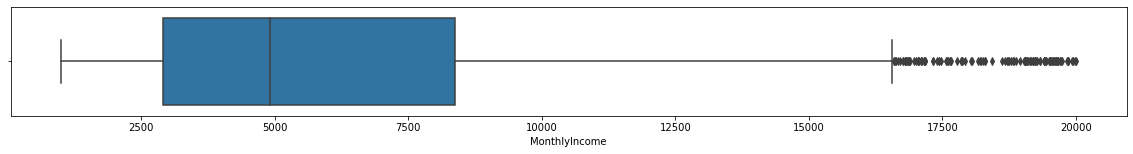


MonthlyRate has no outliers

NumCompaniesWorked
The upper whisker is at: 8.50
The number of points outside the upper whisker is:  52
Percentage from total 3.54 %


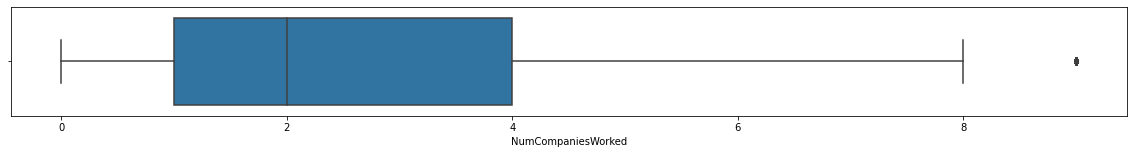


PercentSalaryHike has no outliers

PerformanceRating
The upper whisker is at: 3.00
The number of points outside the upper whisker is:  226
Percentage from total 15.37 %


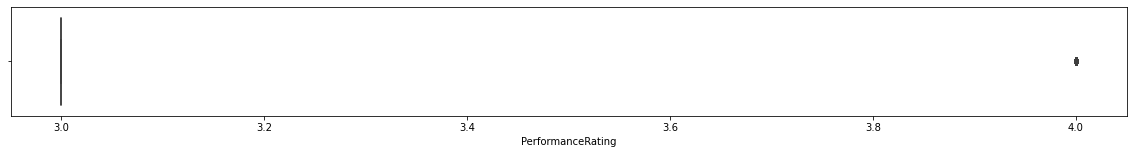


RelationshipSatisfaction has no outliers

StockOptionLevel
The upper whisker is at: 2.50
The number of points outside the upper whisker is:  85
Percentage from total 5.78 %


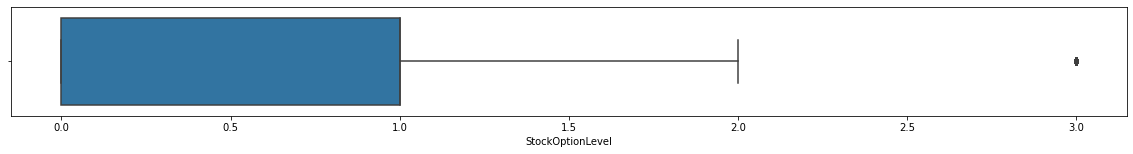


TotalWorkingYears
The upper whisker is at: 28.50
The number of points outside the upper whisker is:  63
Percentage from total 4.29 %


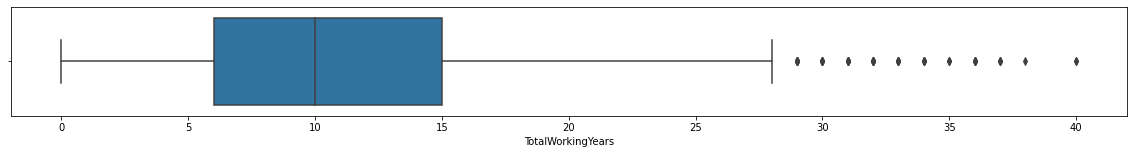


TrainingTimesLastYear
The upper whisker is at: 4.50
The number of points outside the upper whisker is:  184
Percentage from total 12.52 %


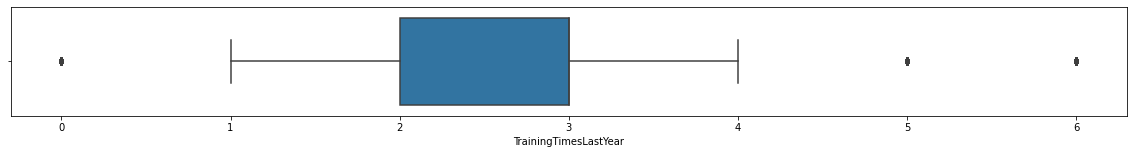


WorkLifeBalance has no outliers

YearsAtCompany
The upper whisker is at: 18.00
The number of points outside the upper whisker is:  104
Percentage from total 7.07 %


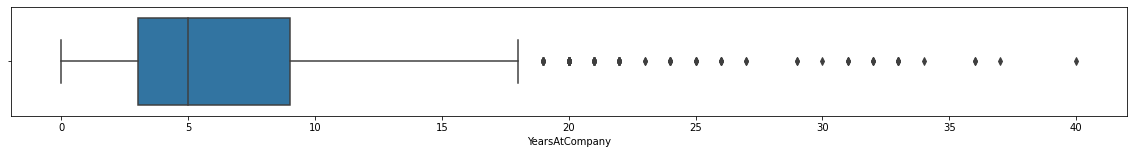


YearsInCurrentRole
The upper whisker is at: 14.50
The number of points outside the upper whisker is:  21
Percentage from total 1.43 %


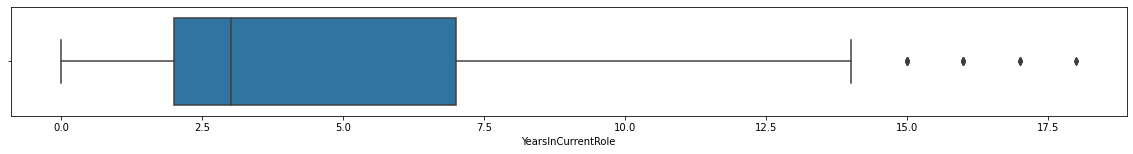


YearsSinceLastPromotion
The upper whisker is at: 7.50
The number of points outside the upper whisker is:  107
Percentage from total 7.28 %


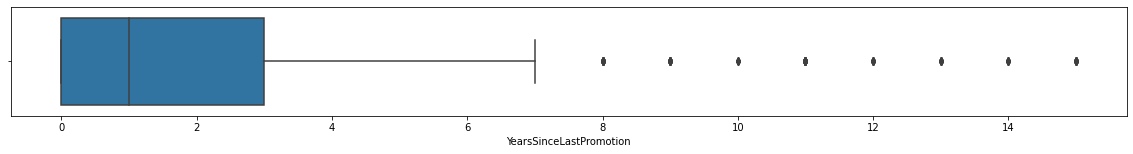


YearsWithCurrManager
The upper whisker is at: 14.50
The number of points outside the upper whisker is:  14
Percentage from total 0.95 %


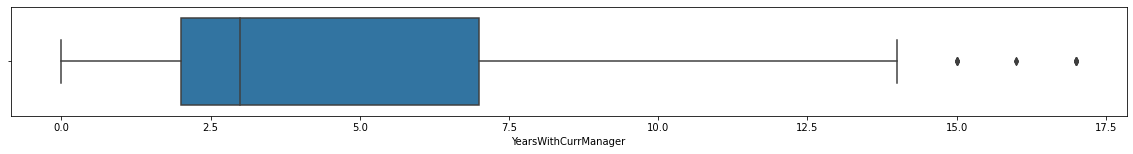

,name,perc
13,PerformanceRating,15.37
17,TrainingTimesLastYear,12.52
9,MonthlyIncome,7.76
21,YearsSinceLastPromotion,7.28
19,YearsAtCompany,7.07
15,StockOptionLevel,5.78
16,TotalWorkingYears,4.29
11,NumCompaniesWorked,3.54
20,YearsInCurrentRole,1.43
22,YearsWithCurrManager,0.95


In [18]:
def get_outliers(data):
    
    outliers_list = pd.DataFrame (columns = ['name', 'perc'])
    
    for i in data:  
        iqr = np.percentile(data[i],75) - np.percentile(data[i],25)
        upper_limit = np.percentile(data[i],75) + 1.5*iqr    
        outliers = data[data[i] > upper_limit].index.tolist()       
        
        
        if len(outliers) > 0:
            print (i)
            print("The upper whisker is at: %4.2f" % upper_limit)
            print("The number of points outside the upper whisker is: ",len(outliers))
            print("Percentage from total", round(len(outliers)*100/len(data[i]),2), '%')
            ax, fig = plt.subplots(figsize = (20,2))
            sns.boxplot(x=i, data=data)
            plt.show()
        else:
            print (i, 'has no outliers')
        print()
        
        perc = round(len(outliers)*100/len(data[i]),2)
        outliers_list = outliers_list.append({'name': i, 'perc': perc}, ignore_index=True)
        
    outliers_list = outliers_list.sort_values(by=['perc'],ascending=False)
    
    return outliers_list
        
get_outliers(numerical)

## Skewness, Kurtosis & Q-Q-Plot

**Note:**

All features are in 

    - acceptable range [-2,2] for skewness ("tailness") and
    - accepatble range [-7,7] for kurtosis ("spikeness")
    
so I won't drop any features at this point.

In [19]:
#checking skewness for numerical variabless

from scipy.stats import skew
numerical.apply(skew)

Age                         0.412864
DailyRate                  -0.003515
DistanceFromHome            0.957140
Education                  -0.289385
EnvironmentSatisfaction    -0.321326
HourlyRate                 -0.032278
JobInvolvement             -0.497911
JobLevel                    1.024355
JobSatisfaction            -0.329335
MonthlyIncome               1.368419
MonthlyRate                 0.018559
NumCompaniesWorked          1.025423
PercentSalaryHike           0.820290
PerformanceRating           1.919921
RelationshipSatisfaction   -0.302518
StockOptionLevel            0.967991
TotalWorkingYears           1.116032
TrainingTimesLastYear       0.552560
WorkLifeBalance            -0.551916
YearsAtCompany              1.762728
YearsInCurrentRole          0.916427
YearsSinceLastPromotion     1.982265
YearsWithCurrManager        0.832600
dtype: float64

In [20]:
#checking kurtosis for numerical variables

from scipy.stats import kurtosis
for i in numerical:
    print(i, '--------', kurtosis(numerical[i]))

Age -------- -0.40685066033188644
DailyRate -------- -1.2038109279028506
DistanceFromHome -------- -0.22814825132111594
Education -------- -0.5612938830603977
EnvironmentSatisfaction -------- -1.2025130674031412
HourlyRate -------- -1.1964118053930861
JobInvolvement -------- 0.265999021507501
JobLevel -------- 0.3937168298009439
JobSatisfaction -------- -1.2221182660739298
MonthlyIncome -------- 0.9977379294765711
MonthlyRate -------- -1.2149063875748307
NumCompaniesWorked -------- 0.006100250967981058
PercentSalaryHike -------- -0.303655610360515
PerformanceRating -------- 1.6860968044845306
RelationshipSatisfaction -------- -1.1848666964710344
StockOptionLevel -------- 0.3593164036666212
TotalWorkingYears -------- 0.9110702861207964
TrainingTimesLastYear -------- 0.48923208120472994
WorkLifeBalance -------- 0.41395625916013534
YearsAtCompany -------- 3.918056556094462
YearsInCurrentRole -------- 0.47171958121354685
YearsSinceLastPromotion -------- 3.596317950017548
YearsWithCurrManag

Q-Q plot for variable: DailyRate


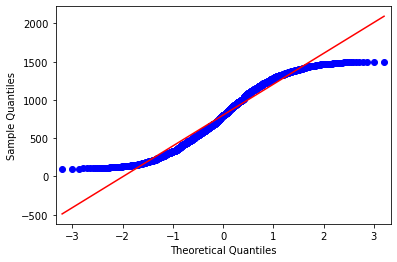

Q-Q plot for variable: HourlyRate


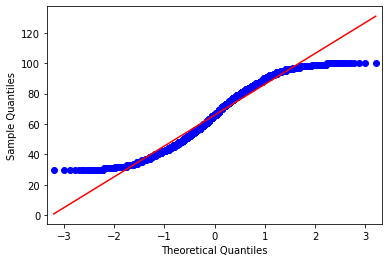

Q-Q plot for variable: MonthlyIncome


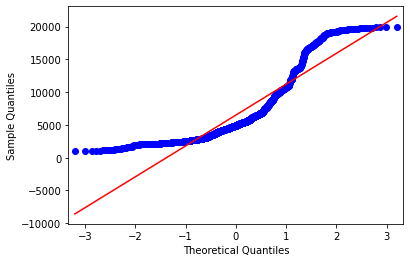

Q-Q plot for variable: MonthlyRate


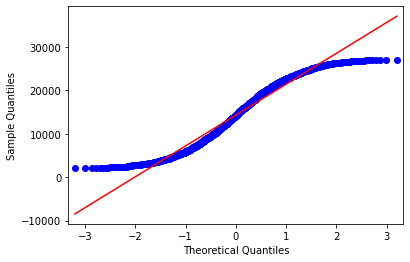

In [21]:
# qualitative test of normality (Q-Q Plot)
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
 
cols = list(continuous.columns)
for col in cols:
    print('Q-Q plot for variable:', col)
    qqplot(continuous[col], line='s')
    plt.show()

## Plotting Data

### Pie Chart of Target 'Attrition'

Target is highly imbalanced.

In [22]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=data['Attrition'], values=data['Attrition'].value_counts()))
fig.update_layout(autosize=False, width=400, height=350)
fig.show()

### Histograms (Numericals)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>],
       [<AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>],
       [<AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title

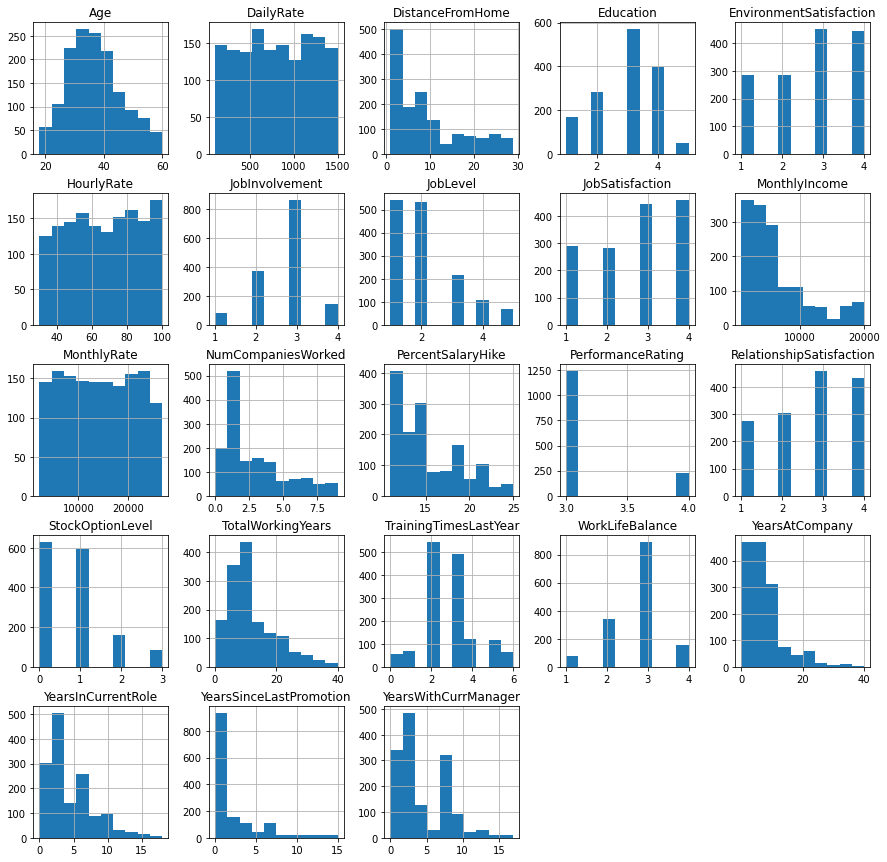

In [23]:
data.hist(figsize=[15,15])

### Distplots (Continuous)

In [24]:
continuous.columns

Index(['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate'], dtype='object')

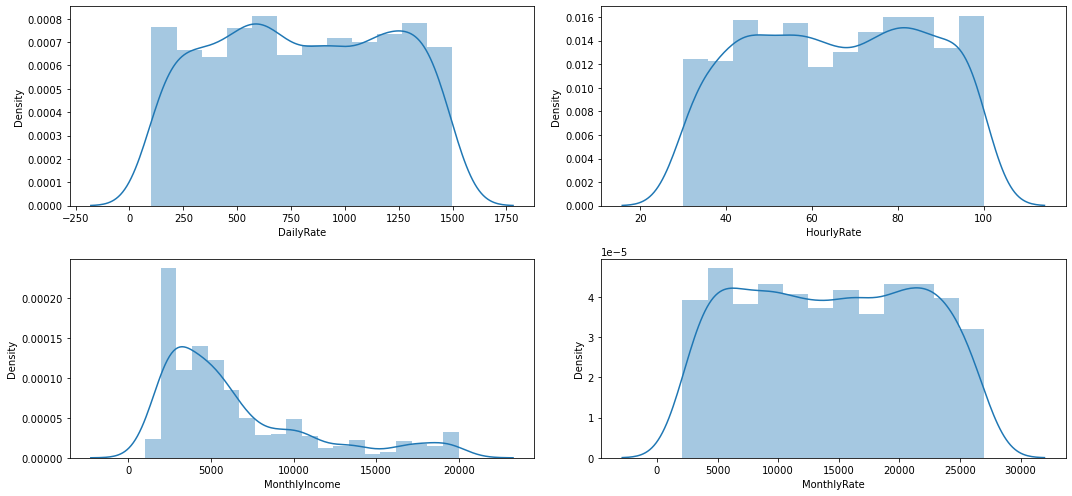

In [25]:
fig, ax = plt.subplots(2,2, figsize=(15,7))

sns.distplot(data['DailyRate'], ax = ax[0,0])
sns.distplot(data['HourlyRate'], ax = ax[0,1])
sns.distplot(data['MonthlyIncome'], ax = ax[1,0])
sns.distplot(data['MonthlyRate'], ax = ax[1,1])

plt.tight_layout()
plt.show()

### Countplots (Discrete & Categorical subdevided by target)

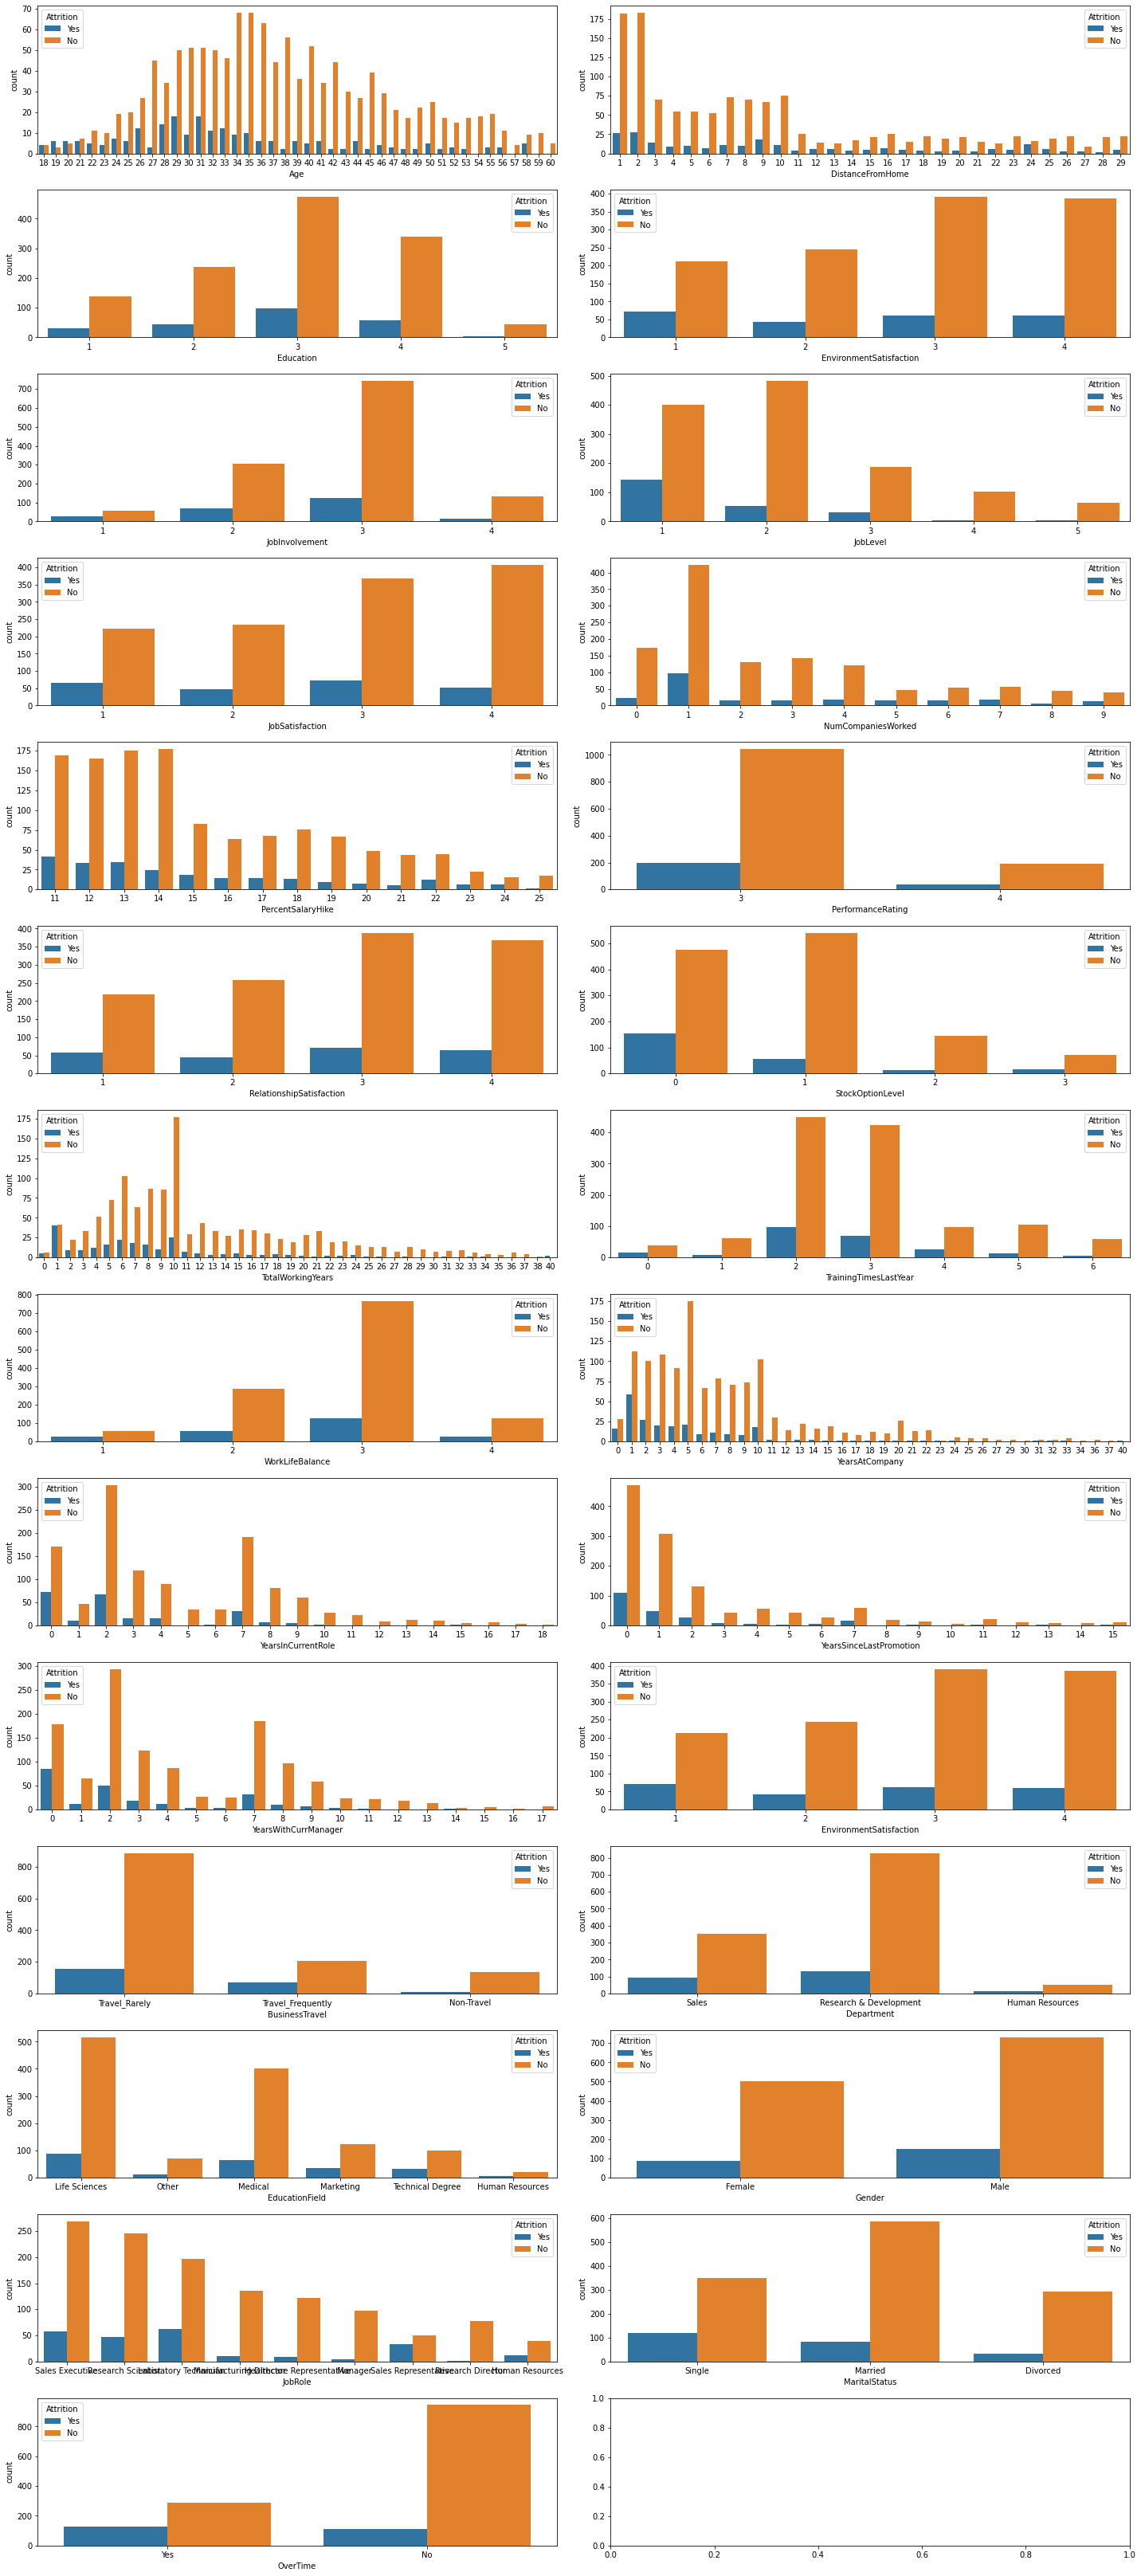

In [26]:
fig, ax = plt.subplots(14,2, figsize=(20,45))

sns.countplot(x = "Age", hue = "Attrition", data=data, ax = ax[0,0])
sns.countplot(x = "DistanceFromHome", hue = "Attrition", data=data, ax = ax[0,1])
sns.countplot(x = "Education", hue = "Attrition", data=data, ax = ax[1,0])
sns.countplot(x = "EnvironmentSatisfaction", hue = "Attrition", data=data, ax = ax[1,1])
sns.countplot(x = "JobInvolvement", hue = "Attrition", data=data, ax = ax[2,0])
sns.countplot(x = "JobLevel", hue = "Attrition", data=data, ax = ax[2,1])
sns.countplot(x = "JobSatisfaction", hue = "Attrition", data=data, ax = ax[3,0])
sns.countplot(x = "NumCompaniesWorked", hue = "Attrition", data=data, ax = ax[3,1])
sns.countplot(x = "PercentSalaryHike", hue = "Attrition", data=data, ax = ax[4,0])
sns.countplot(x = "PerformanceRating", hue = "Attrition", data=data, ax = ax[4,1])
sns.countplot(x = "RelationshipSatisfaction", hue = "Attrition", data=data, ax = ax[5,0])
sns.countplot(x = "StockOptionLevel", hue = "Attrition", data=data, ax = ax[5,1])
sns.countplot(x = "TotalWorkingYears", hue = "Attrition", data=data, ax = ax[6,0])
sns.countplot(x = "TrainingTimesLastYear", hue = "Attrition", data=data, ax = ax[6,1])
sns.countplot(x = "WorkLifeBalance", hue = "Attrition", data=data, ax = ax[7,0])
sns.countplot(x = "YearsAtCompany", hue = "Attrition", data=data, ax = ax[7,1])
sns.countplot(x = "YearsInCurrentRole", hue = "Attrition", data=data, ax = ax[8,0])
sns.countplot(x = "YearsSinceLastPromotion", hue = "Attrition", data=data, ax = ax[8,1])
sns.countplot(x = "YearsWithCurrManager", hue = "Attrition", data=data, ax = ax[9,0])
sns.countplot(x = "EnvironmentSatisfaction", hue = "Attrition", data=data, ax = ax[9,1])
sns.countplot(x = "BusinessTravel", hue = "Attrition", data=data, ax = ax[10,0])
sns.countplot(x = "Department", hue = "Attrition", data=data, ax = ax[10,1])
sns.countplot(x = "EducationField", hue = "Attrition", data=data, ax = ax[11,0])
sns.countplot(x = "Gender", hue = "Attrition", data=data, ax = ax[11,1])
sns.countplot(x = "JobRole", hue = "Attrition", data=data, ax = ax[12,0])
sns.countplot(x = "MaritalStatus", hue = "Attrition", data=data, ax = ax[12,1])
sns.countplot(x = "OverTime", hue = "Attrition", data=data, ax = ax[13,0])

plt.tight_layout()
plt.show()

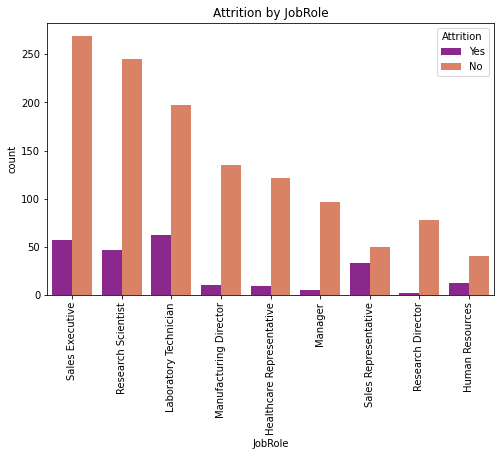

In [27]:
#to improve readability of JobRole
plt.figure(figsize=(8,5))
sns.countplot(x='JobRole',hue='Attrition', data=data, palette='plasma')
plt.title("Attrition by JobRole")
plt.xticks(rotation=90)
plt.show()

### Other Plots

In [28]:
income_attr = data.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['Attrition'].count()).reset_index(name='Counts')
income_attr['MonthlyIncome'] = round(income_attr['MonthlyIncome'],-3)
income_attr = income_attr.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig = px.line(income_attr, x='MonthlyIncome', y='Counts', color='Attrition', title='Attrition by Monthly Income')
fig.show()

**Note:** The attrition rate is evidently high at low income levels (less than 6k per month). Another minor spike is noticed around 10k (middle class) when people tend to shift towards a better standard of living and, hence, move to a different job. When the monthly income is pretty decent, chances of an employee leaving the company is very low.

In [29]:
age_attr = data.groupby(['Age','Attrition']).apply(lambda x:x['Attrition'].count()).reset_index(name='Counts')
px.line(age_attr, x='Age', y='Counts', color='Attrition', title='Attrition by Age')

**Note:** The attrition is maximum between the age groups 28 and 32 ("exploration pahes") and keeps falling with increasing age, as people look for stability in their jobs.

In [30]:
comp_attr = data.groupby(['NumCompaniesWorked','Attrition']).apply(lambda x: x['Attrition'].count()).reset_index(name='Counts')
px.area(comp_attr, x='NumCompaniesWorked', y='Counts', color='Attrition', title='Attrition by Number of Companies Worked for')

**Note:** Employees who started their career with the company or have switched to the company in their first years of their career, have a higher chances of leaving the company.

In [31]:
stock_attr = data.groupby(['StockOptionLevel','Attrition']).apply(lambda x: x['Attrition'].count()).reset_index(name='Counts')
px.bar(stock_attr, x='StockOptionLevel', y='Counts', color='Attrition', title='Attrition by Stock Option Levels')

**Note:** The attrition of employees is much higher when the available stock options are limited or non-existent.

# Preprocessing Data

## Categorical

In [32]:
categorical

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
EmployeeNumber,,,,,,,,
1,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
2,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
4,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
5,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
7,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
2061,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
2062,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
2064,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes


### Manually Changing some Categoricals to Ordinals

In [33]:
cat_ord = categorical.copy()
cat_ord = cat_ord.drop(['Department', 'EducationField', 'JobRole'], axis=1)
cat_ord

,Attrition,BusinessTravel,Gender,MaritalStatus,OverTime
EmployeeNumber,,,,,
1,Yes,Travel_Rarely,Female,Single,Yes
2,No,Travel_Frequently,Male,Married,No
4,Yes,Travel_Rarely,Male,Single,Yes
5,No,Travel_Frequently,Female,Married,Yes
7,No,Travel_Rarely,Male,Married,No
...,...,...,...,...,...
2061,No,Travel_Frequently,Male,Married,No
2062,No,Travel_Rarely,Male,Married,No
2064,No,Travel_Rarely,Male,Married,Yes


In [34]:
#cat_ord['Attrition'] = cat_ord['Attrition'].replace({'No':0,'Yes':1})
cat_ord['BusinessTravel'] = cat_ord['BusinessTravel'].replace({'Non-Travel':0,'Travel_Rarely':1, 'Travel_Frequently':2})
cat_ord['Gender'] = cat_ord['Gender'].replace({'Male':0,'Female':1})
cat_ord['MaritalStatus'] = cat_ord['MaritalStatus'].replace({'Single':0,'Married':1, 'Divorced':2})
cat_ord['OverTime'] = cat_ord['OverTime'].replace({'No':0,'Yes':1})

In [35]:
for i in cat_ord:
    print('Catagory: ', i)
    print(cat_ord[i].value_counts())
    print('\n')

Catagory:  Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64


Catagory:  BusinessTravel
1    1043
2     277
0     150
Name: BusinessTravel, dtype: int64


Catagory:  Gender
0    882
1    588
Name: Gender, dtype: int64


Catagory:  MaritalStatus
1    673
0    470
2    327
Name: MaritalStatus, dtype: int64


Catagory:  OverTime
0    1054
1     416
Name: OverTime, dtype: int64




### Dummify rest of Categoricals

In [36]:
cat_dummy = categorical.copy()
cat_dummy = cat_dummy.drop(['Attrition', 'BusinessTravel', 'Gender', 'MaritalStatus', 'OverTime'], axis=1)
cat_dummy

,Department,EducationField,JobRole
EmployeeNumber,,,
1,Sales,Life Sciences,Sales Executive
2,Research & Development,Life Sciences,Research Scientist
4,Research & Development,Other,Laboratory Technician
5,Research & Development,Life Sciences,Research Scientist
7,Research & Development,Medical,Laboratory Technician
...,...,...,...
2061,Research & Development,Medical,Laboratory Technician
2062,Research & Development,Medical,Healthcare Representative
2064,Research & Development,Life Sciences,Manufacturing Director


In [37]:
cat_dummy = pd.get_dummies(cat_dummy)
cat_dummy

,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
EmployeeNumber,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2062,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2064,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


## Concatenate all Features

In [38]:
data_final = pd.concat([numerical, cat_ord, cat_dummy], axis = 1)
data_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Gender,MaritalStatus,OverTime,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,Yes,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,No,2,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,Yes,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,No,2,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,No,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


# Model "raw"

In [39]:
def model_raw(df, model):
    
    # 1 # X-Y-SPLIT
    y = df['Attrition']
    X = df.drop(['Attrition'],axis=1)

    # 2 # TRAIN-TEST-SPLIT
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # 3 # MODELING
    print(model)
    print("---------------------")
    model = model
    classification = model.fit(X_train, y_train)
    y_train_pred = classification.predict(X_train)
    y_test_pred = classification.predict(X_test)
    probability = classification.predict_proba(X_test)
        
    # 4 # ERROR METRICS
    print("Accuracy of the TRAIN set      = ", round(classification.score(X_train, y_train),2))
    print("Cohen's Kappa of the TRAIN set = ", round(cohen_kappa_score(y_train,y_train_pred),2))

    print("------- TRAIN -------")
    print(classification_report(y_train, y_train_pred))
    print("---------------------")

    print("Accuracy of the TEST set      = ", round(classification.score(X_test, y_test),2))
    print("Cohen's Kappa of the TEST set = ", round(cohen_kappa_score(y_test, y_test_pred),2))

    print("------- TEST -------")
    print(classification_report(y_test, y_test_pred))
    print("---------------------")
    
    # 5 # CONFUSION MATRIX
    print("Confusion Matrix:")
    plot_confusion_matrix(classification, X_test, y_test)
    plt.show()

## Linear Algorithms

### Logistic Regression

LogisticRegression()
---------------------
Accuracy of the TRAIN set      =  0.84
Cohen's Kappa of the TRAIN set =  0.02
------- TRAIN -------
              precision    recall  f1-score   support

          No       0.84      1.00      0.91       988
         Yes       0.75      0.02      0.03       188

    accuracy                           0.84      1176
   macro avg       0.80      0.51      0.47      1176
weighted avg       0.83      0.84      0.77      1176

---------------------
Accuracy of the TEST set      =  0.84
Cohen's Kappa of the TEST set =  0.03
------- TEST -------
              precision    recall  f1-score   support

          No       0.84      1.00      0.91       245
         Yes       1.00      0.02      0.04        49

    accuracy                           0.84       294
   macro avg       0.92      0.51      0.48       294
weighted avg       0.86      0.84      0.77       294

---------------------
Confusion Matrix:


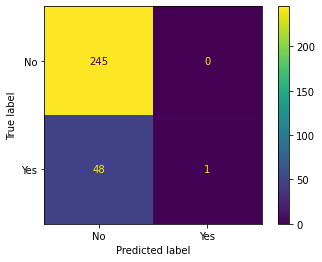

In [40]:
model_raw(data_final, model = LogisticRegression())

## Non-linear Algorithms

### Support Vector Machine Classifier

SVC(gamma='auto', probability=True)
---------------------
Accuracy of the TRAIN set      =  1.0
Cohen's Kappa of the TRAIN set =  1.0
------- TRAIN -------
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       988
         Yes       1.00      1.00      1.00       188

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

---------------------
Accuracy of the TEST set      =  0.83
Cohen's Kappa of the TEST set =  0.0
------- TEST -------
              precision    recall  f1-score   support

          No       0.83      1.00      0.91       245
         Yes       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294

---------------------
Confusion Matrix:


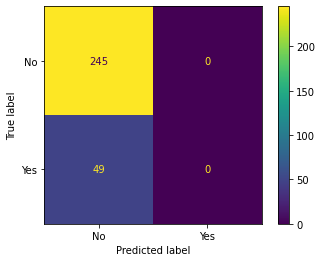

In [41]:
model_raw(data_final, model = SVC(gamma='auto', probability=True))

### MLP Classifier

MLPClassifier()
---------------------
Accuracy of the TRAIN set      =  0.81
Cohen's Kappa of the TRAIN set =  0.17
------- TRAIN -------
              precision    recall  f1-score   support

          No       0.86      0.91      0.89       988
         Yes       0.34      0.24      0.28       188

    accuracy                           0.81      1176
   macro avg       0.60      0.58      0.58      1176
weighted avg       0.78      0.81      0.79      1176

---------------------
Accuracy of the TEST set      =  0.76
Cohen's Kappa of the TEST set =  0.0
------- TEST -------
              precision    recall  f1-score   support

          No       0.83      0.88      0.86       245
         Yes       0.17      0.12      0.14        49

    accuracy                           0.76       294
   macro avg       0.50      0.50      0.50       294
weighted avg       0.72      0.76      0.74       294

---------------------
Confusion Matrix:


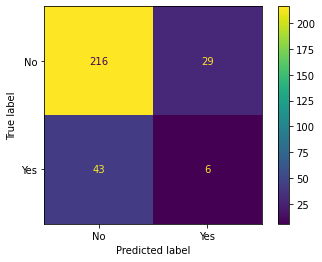

In [42]:
model_raw(data_final, model = MLPClassifier())

## Ensemble Algorithms

### Random Forest Classifier

RandomForestClassifier()
---------------------
Accuracy of the TRAIN set      =  1.0
Cohen's Kappa of the TRAIN set =  1.0
------- TRAIN -------
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       988
         Yes       1.00      1.00      1.00       188

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

---------------------
Accuracy of the TEST set      =  0.85
Cohen's Kappa of the TEST set =  0.17
------- TEST -------
              precision    recall  f1-score   support

          No       0.85      0.99      0.92       245
         Yes       0.75      0.12      0.21        49

    accuracy                           0.85       294
   macro avg       0.80      0.56      0.56       294
weighted avg       0.83      0.85      0.80       294

---------------------
Confusion Matrix:


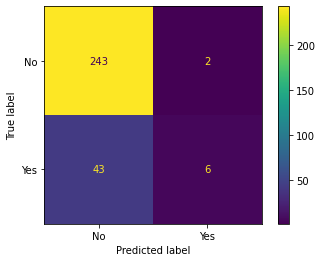

In [43]:
model_raw(data_final, model = RandomForestClassifier())

### Ada Boost Classifier

AdaBoostClassifier()
---------------------
Accuracy of the TRAIN set      =  0.91
Cohen's Kappa of the TRAIN set =  0.62
------- TRAIN -------
              precision    recall  f1-score   support

          No       0.92      0.98      0.95       988
         Yes       0.86      0.54      0.67       188

    accuracy                           0.91      1176
   macro avg       0.89      0.76      0.81      1176
weighted avg       0.91      0.91      0.90      1176

---------------------
Accuracy of the TEST set      =  0.86
Cohen's Kappa of the TEST set =  0.37
------- TEST -------
              precision    recall  f1-score   support

          No       0.88      0.97      0.92       245
         Yes       0.67      0.33      0.44        49

    accuracy                           0.86       294
   macro avg       0.77      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294

---------------------
Confusion Matrix:


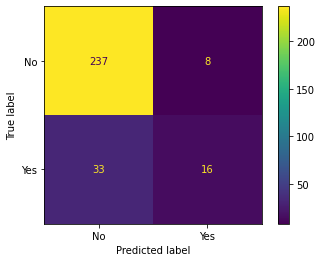

In [44]:
model_raw(data_final, model = AdaBoostClassifier())

### XGBoost Classifier

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
---------------------
[12:48:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of the TRAIN set      =  1.

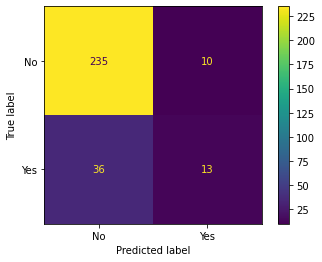

In [45]:
model_raw(data_final, model = XGBClassifier())

# Feature Selection

## Recursive Feature Elimination (RFE)

In [46]:
def rfe(model):
    from sklearn.feature_selection import RFE
    
    X = data_final.drop(['Attrition'],axis=1)
    y = data_final['Attrition']
    
    model = model
    rfe = RFE(model, n_features_to_select=20, verbose=False)
    rfe.fit(X, y)
    
    df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
    df['Column_name'] = X.columns
    
    return df.sort_values(by=['Rank'], ascending=True)

In [47]:
rfe(model = LogisticRegression())

,Rank,Column_name
44,1,JobRole_Sales Representative
24,1,Gender
23,1,BusinessTravel
27,1,Department_Human Resources
29,1,Department_Sales
18,1,WorkLifeBalance
15,1,StockOptionLevel
25,1,MaritalStatus
32,1,EducationField_Marketing
30,1,EducationField_Human Resources


In [48]:
rfe(model = RandomForestClassifier(n_estimators=700,
                                  criterion='entropy', 
                                  max_depth=10, 
                                  min_samples_split=2, 
                                  min_samples_leaf=2, 
                                  max_features='auto'))

,Rank,Column_name
0,1,Age
26,1,OverTime
25,1,MaritalStatus
21,1,YearsSinceLastPromotion
20,1,YearsInCurrentRole
19,1,YearsAtCompany
16,1,TotalWorkingYears
15,1,StockOptionLevel
12,1,PercentSalaryHike
11,1,NumCompaniesWorked


In [49]:
rfe(model = AdaBoostClassifier())

,Rank,Column_name
0,1,Age
26,1,OverTime
25,1,MaritalStatus
24,1,Gender
23,1,BusinessTravel
21,1,YearsSinceLastPromotion
19,1,YearsAtCompany
18,1,WorkLifeBalance
17,1,TrainingTimesLastYear
11,1,NumCompaniesWorked


In [50]:
rfe(model = XGBClassifier())

[12:49:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:49:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:49:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:49:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,Rank,Column_name
0,1,Age
42,1,JobRole_Research Scientist
29,1,Department_Sales
26,1,OverTime
25,1,MaritalStatus
23,1,BusinessTravel
43,1,JobRole_Sales Executive
21,1,YearsSinceLastPromotion
20,1,YearsInCurrentRole
18,1,WorkLifeBalance


## KBest

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data_final.drop(['Attrition'],axis=1)
y = data_final['Attrition']

kbest = SelectKBest(chi2, k=15).fit_transform(X, y)
selected = pd.DataFrame(kbest)

In [52]:
model = SelectKBest(chi2, k=15).fit(X, y)
df = pd.DataFrame(data = model.scores_, columns = ['score'])
df['Column'] = X.columns
print(df.sort_values(by = ['score'], ascending = False).head(15))

            score                         Column
9   127922.293694                  MonthlyIncome
10    1196.633553                    MonthlyRate
1      956.580494                      DailyRate
16     230.721618              TotalWorkingYears
19     142.100054                 YearsAtCompany
20     117.522596             YearsInCurrentRole
22     110.671534           YearsWithCurrManager
0       84.155277                            Age
26      63.845067                       OverTime
2       63.772142               DistanceFromHome
44      34.290268   JobRole_Sales Representative
15      25.268826               StockOptionLevel
7       24.939242                       JobLevel
25      22.785792                  MaritalStatus
38      11.699495  JobRole_Laboratory Technician


## Chi-Square for Categorical Features

    - Null Hypothesis (H0): There is no association between two variables.
    - Alternate Hypothesis (Ha): There is an association between two variables.
    - confidence level: 95% / 0.95
    - significance level: alpha = = 0.05
    - If H0 is rejected, columns are related and I will try to drop some of them later in the process.

In [53]:
def check_chi_square_(df, significance_level):

    columns = df.columns
    chi2 = pd.DataFrame(index=columns, columns=columns)
    p_value = pd.DataFrame(index=columns, columns=columns)
    h0 = pd.DataFrame(index=columns, columns=columns)
    
    for var1, var2 in combinations(columns, 2):
        contingency_table = pd.crosstab(df[var1], df[var2], margins=False)
        chi2_stat= chi2_contingency(contingency_table)[0]
        p_stat= chi2_contingency(contingency_table)[1]
        chi2.loc[var2, var1] = chi2_stat
        chi2.loc[var1, var2] = chi2_stat
        p_value.loc[var2, var1] = p_stat
        p_value.loc[var1, var2] = p_stat
        
        if p_value.loc[var1, var2] < significance_level:
            h0.loc[var1, var2] = 'reject'
        else:
            h0.loc[var1, var2] = 'accept'
        if p_value.loc[var2, var1] < significance_level:
            h0.loc[var2, var1] = 'reject'
        else:
            h0.loc[var2, var1] = 'accept'
    
    return p_value, h0

In [54]:
p_value, h0 = check_chi_square_(categorical, 0.05)

In [55]:
p_value

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
Attrition,NaN,5.60861e-06,0.00452561,0.00677398,0.290572,2.75248e-15,9.45551e-11,8.15842e-21
BusinessTravel,5.60861e-06,NaN,0.995236,0.879649,0.133229,0.744826,0.111618,0.240053
Department,0.00452561,0.995236,NaN,7.77159e-214,0.227127,0,0.15567,0.954275
EducationField,0.00677398,0.879649,7.77159e-214,NaN,0.709016,1.7233e-155,0.477613,0.881482
Gender,0.290572,0.133229,0.227127,0.709016,NaN,0.0419544,0.169667,0.121548
JobRole,2.75248e-15,0.744826,0,1.7233e-155,0.0419544,NaN,0.0424643,0.583831
MaritalStatus,9.45551e-11,0.111618,0.15567,0.477613,0.169667,0.0424643,NaN,0.664739
OverTime,8.15842e-21,0.240053,0.954275,0.881482,0.121548,0.583831,0.664739,NaN


In [56]:
h0

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
Attrition,NaN,reject,reject,reject,accept,reject,reject,reject
BusinessTravel,reject,NaN,accept,accept,accept,accept,accept,accept
Department,reject,accept,NaN,reject,accept,reject,accept,accept
EducationField,reject,accept,reject,NaN,accept,reject,accept,accept
Gender,accept,accept,accept,accept,NaN,reject,accept,accept
JobRole,reject,accept,reject,reject,reject,NaN,reject,accept
MaritalStatus,reject,accept,accept,accept,accept,reject,NaN,accept
OverTime,reject,accept,accept,accept,accept,accept,accept,NaN


## Pearson' Correlation for Numerical Features

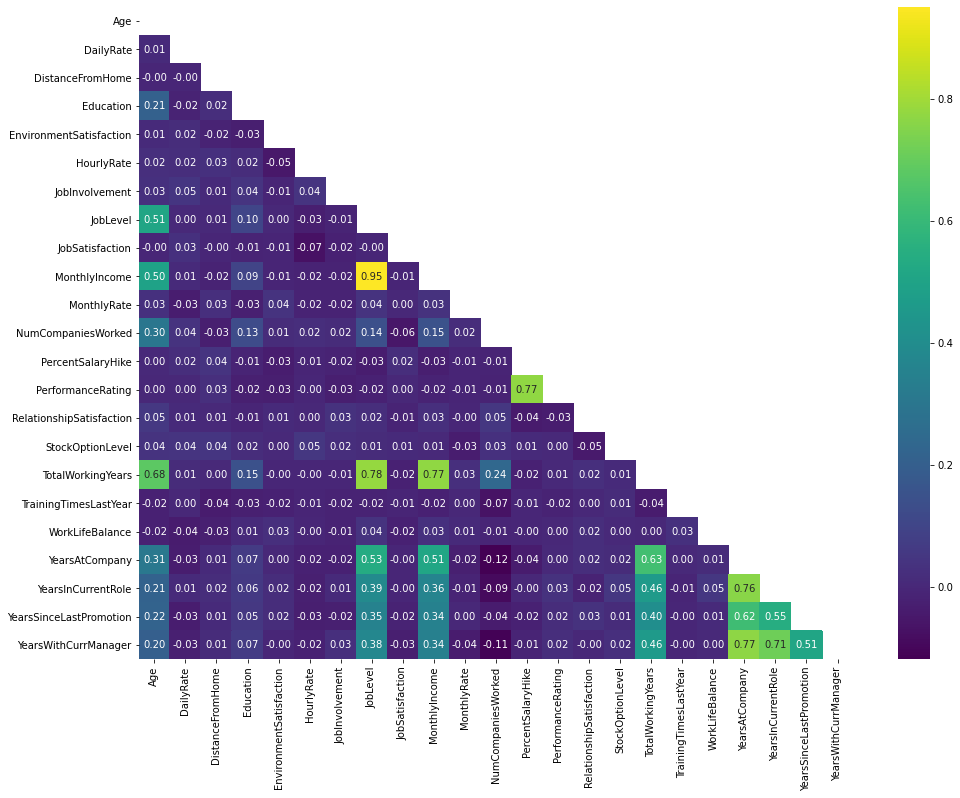

In [57]:
#half correlation matrix
corr_data = numerical.copy()
 
correlations_matrix = corr_data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, fmt='.2f',cmap='viridis')
plt.show()

## VIF (Variance Inflation Factor) for Numerical Features

**Note:**

    - As also seen in the correlation matrix JobLevel and MonthlyIncome have an VIF higher than 10. 
    I might try to drop one of them. (Both approaches didn't improve the model(s).)

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif = {}
corr_data = add_constant(corr_data)

for i in np.arange(corr_data.shape[1]):
    column_name = corr_data.columns[i]
    value = variance_inflation_factor(np.array(corr_data), i)
    vif[column_name] = value

print(vif)

{'const': 202.09354223952192, 'Age': 2.044890360341929, 'DailyRate': 1.018198320642176, 'DistanceFromHome': 1.015515408661384, 'Education': 1.0593518566506899, 'EnvironmentSatisfaction': 1.010099477753196, 'HourlyRate': 1.0183184311677236, 'JobInvolvement': 1.0163161211902632, 'JobLevel': 11.205067060779474, 'JobSatisfaction': 1.0145106684576282, 'MonthlyIncome': 10.800070439778152, 'MonthlyRate': 1.0122820766028304, 'NumCompaniesWorked': 1.2577371851183325, 'PercentSalaryHike': 2.516384796769057, 'PerformanceRating': 2.5137340989827597, 'RelationshipSatisfaction': 1.0157711246340237, 'StockOptionLevel': 1.0176823168007594, 'TotalWorkingYears': 4.767796312856023, 'TrainingTimesLastYear': 1.0099166114746663, 'WorkLifeBalance': 1.0148842242046825, 'YearsAtCompany': 4.587391058192637, 'YearsInCurrentRole': 2.7186035197467806, 'YearsSinceLastPromotion': 1.6742777206538582, 'YearsWithCurrManager': 2.7745870824357297}


In [59]:
flag = True
threshold = 50
corr_data = add_constant(corr_data)

while flag is True:
    flag = False
    values = [variance_inflation_factor(np.array(corr_data), i) for i in np.arange(corr_data.shape[1])]
    if max(values)> threshold:
        col_index = values.index(max(values))
        column_name = corr_data.columns[col_index]
        corr_data = corr_data.drop([column_name], axis=1)
        flag = True

print(corr_data.columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


# Predictive Modeling incl. Hyperparameter Tuning

**Note:** 

    - Because the dataset is in total quite small, I use a combination of TomekLinks and SMOTE to not shrink it even more.
    - Also because of the size of the dataset, I use a test size of 20% of the total.
    - As the StandardScaler works best to scale the features, I go with this one.

In [61]:
def modeling(df, scaler, model):
    
    # 1 # X-Y-SPLIT
    y = df['Attrition']
    X = df.drop(['Attrition'],axis=1)

    # 2 # TRAIN-TEST-SPLIT
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    # 3 # SCALING
    #transform X_train
    transformer = scaler.fit(X_train)
    #scale X_train and X_test on same transformer
    X_train_scaled = pd.DataFrame(transformer.transform(X_train), columns=X.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(transformer.transform(X_test), columns=X.columns, index=X_test.index)

    # 4 # DOWNSAMPLE / UPSAMPLE
    X_train_scaled_sampled_, y_train_sampled_ = TomekLinks('majority').fit_sample(X_train_scaled, y_train)
    X_train_scaled_sampled, y_train_sampled = SMOTE().fit_sample(X_train_scaled_sampled_, y_train_sampled_)
    print("TomekLinks ----- ", "before: ", len(X_train_scaled), "| after: ", len(X_train_scaled_sampled_))
    print("SMOTE      ----- ", "before: ", len(X_train_scaled_sampled_), "| after: ", len(X_train_scaled_sampled))
    print("---------------------------------------------")

    # 5 # MODELING
    print(model)
    print("---------------------------------------------")
    model = model
    clf = model.fit(X_train_scaled_sampled, y_train_sampled)
    y_train_sampled_pred = clf.predict(X_train_scaled_sampled)
    y_test_pred = clf.predict(X_test_scaled)
    probability = clf.predict_proba(X_test_scaled)
        
    # 6 # ERROR METRICS
    print("Accuracy of the TRAIN set      = ", round(clf.score(X_train_scaled_sampled, y_train_sampled),2))
    print("Cohen's kappa of the TRAIN set = ", round(cohen_kappa_score(y_train_sampled,y_train_sampled_pred),2))

    print("------------------- TRAIN -------------------")
    print(classification_report(y_train_sampled, y_train_sampled_pred))
    print("---------------------------------------------")

    print("Accuracy of the TEST set      = ", round(clf.score(X_test_scaled,y_test),2))
    print("Cohen's kappa of the TEST set = ", round(cohen_kappa_score(y_test,y_test_pred),2))

    print("------------------- TEST --------------------")
    print(classification_report(y_test, y_test_pred))
    print("---------------------------------------------")
    
    # 7 # CONFUSION MATRIX
    print("Confusion Matrix:")   
    plot_confusion_matrix(clf, X_test_scaled, y_test)
    plt.show()
    
    return X_train_scaled_sampled, y_train_sampled

## Linear Algorithms

### Logistic Regression

In [62]:
data_lr = data_final.copy()
data_lr = data_lr.drop(['MonthlyRate', 
                        'DailyRate', 
                        'MonthlyIncome', 
                        'JobLevel'], axis=1)

TomekLinks -----  before:  1176 | after:  1138
SMOTE      -----  before:  1138 | after:  1896
---------------------------------------------
LogisticRegression(multi_class='ovr', random_state=100)
---------------------------------------------
Accuracy of the TRAIN set      =  0.84
Cohen's kappa of the TRAIN set =  0.68
------------------- TRAIN -------------------
              precision    recall  f1-score   support

          No       0.85      0.82      0.84       948
         Yes       0.83      0.86      0.84       948

    accuracy                           0.84      1896
   macro avg       0.84      0.84      0.84      1896
weighted avg       0.84      0.84      0.84      1896

---------------------------------------------
Accuracy of the TEST set      =  0.76
Cohen's kappa of the TEST set =  0.33
------------------- TEST --------------------
              precision    recall  f1-score   support

          No       0.92      0.78      0.85       247
         Yes       0.36      0

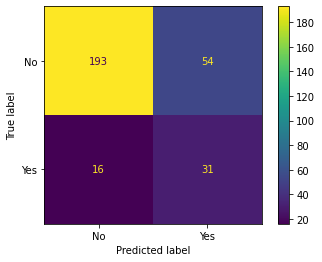

In [63]:
X_train_scaled_sampled, y_train_sampled = modeling(data_lr, scaler = StandardScaler(), 
                                                   model = LogisticRegression(random_state=100, 
                                                                              solver='lbfgs', 
                                                                              multi_class='ovr'))

In [64]:
data_lr2 = data_final.copy()

TomekLinks -----  before:  1176 | after:  1137
SMOTE      -----  before:  1137 | after:  1894
---------------------------------------------
LogisticRegression(class_weight={'No': 0.4, 'Yes': 0.6}, random_state=100,
                   solver='newton-cg')
---------------------------------------------
Accuracy of the TRAIN set      =  0.84
Cohen's kappa of the TRAIN set =  0.67
------------------- TRAIN -------------------
              precision    recall  f1-score   support

          No       0.90      0.76      0.82       947
         Yes       0.79      0.92      0.85       947

    accuracy                           0.84      1894
   macro avg       0.85      0.84      0.84      1894
weighted avg       0.85      0.84      0.84      1894

---------------------------------------------
Accuracy of the TEST set      =  0.74
Cohen's kappa of the TEST set =  0.32
------------------- TEST --------------------
              precision    recall  f1-score   support

          No       0.93   

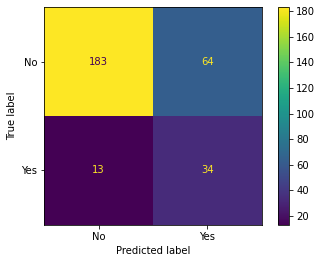

In [65]:
X_train_scaled_sampled, y_train_sampled = modeling(data_lr2, scaler = StandardScaler(), 
                                                   model = LogisticRegression(random_state=100, 
                                                                              solver='newton-cg', 
                                                                              class_weight={'No': 0.4, 'Yes': 0.6}))

## Non-linear Algorithms

### Support Vector Machine Classifier

In [66]:
data_svm = data_final.copy()

TomekLinks -----  before:  1176 | after:  1137
SMOTE      -----  before:  1137 | after:  1894
---------------------------------------------
SVC(class_weight='balanced', gamma='auto', probability=True)
---------------------------------------------
Accuracy of the TRAIN set      =  0.97
Cohen's kappa of the TRAIN set =  0.94
------------------- TRAIN -------------------
              precision    recall  f1-score   support

          No       0.98      0.95      0.97       947
         Yes       0.95      0.98      0.97       947

    accuracy                           0.97      1894
   macro avg       0.97      0.97      0.97      1894
weighted avg       0.97      0.97      0.97      1894

---------------------------------------------
Accuracy of the TEST set      =  0.82
Cohen's kappa of the TEST set =  0.36
------------------- TEST --------------------
              precision    recall  f1-score   support

          No       0.90      0.87      0.89       247
         Yes       0.44  

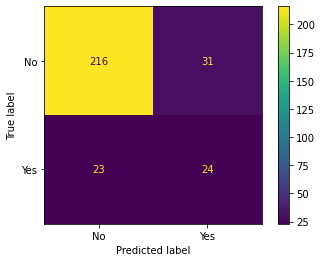

In [67]:
X_train_scaled_sampled, y_train_sampled = modeling(data_svm, scaler = StandardScaler(), 
                                                   model = SVC(gamma='auto', probability=True, class_weight='balanced'))

### MLP Classifier

In [68]:
data_mlp = data_final.copy()

TomekLinks -----  before:  1176 | after:  1137
SMOTE      -----  before:  1137 | after:  1894
---------------------------------------------
MLPClassifier(max_iter=50, random_state=1)
---------------------------------------------
Accuracy of the TRAIN set      =  0.98
Cohen's kappa of the TRAIN set =  0.96
------------------- TRAIN -------------------
              precision    recall  f1-score   support

          No       0.99      0.97      0.98       947
         Yes       0.97      0.99      0.98       947

    accuracy                           0.98      1894
   macro avg       0.98      0.98      0.98      1894
weighted avg       0.98      0.98      0.98      1894

---------------------------------------------
Accuracy of the TEST set      =  0.83
Cohen's kappa of the TEST set =  0.4
------------------- TEST --------------------
              precision    recall  f1-score   support

          No       0.91      0.88      0.89       247
         Yes       0.46      0.55      0.50 

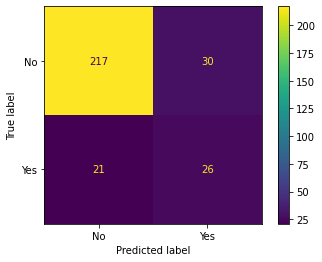

In [69]:
X_train_scaled_sampled, y_train_sampled = modeling(data_mlp, scaler = StandardScaler(), 
                                                   model = MLPClassifier(random_state=1, max_iter=50))

TomekLinks -----  before:  1176 | after:  1137
SMOTE      -----  before:  1137 | after:  1894
---------------------------------------------
MLPClassifier(random_state=1)
---------------------------------------------
Accuracy of the TRAIN set      =  1.0
Cohen's kappa of the TRAIN set =  1.0
------------------- TRAIN -------------------
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       947
         Yes       1.00      1.00      1.00       947

    accuracy                           1.00      1894
   macro avg       1.00      1.00      1.00      1894
weighted avg       1.00      1.00      1.00      1894

---------------------------------------------
Accuracy of the TEST set      =  0.84
Cohen's kappa of the TEST set =  0.4
------------------- TEST --------------------
              precision    recall  f1-score   support

          No       0.91      0.90      0.90       247
         Yes       0.49      0.51      0.50        47

    

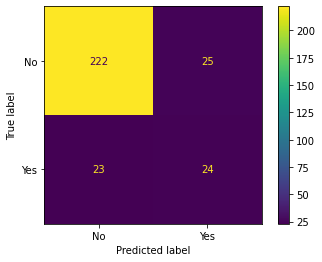

In [70]:
X_train_scaled_sampled, y_train_sampled = modeling(data_mlp, scaler = StandardScaler(), 
                                                   model = MLPClassifier(random_state=1, 
                                                                         max_iter=200))

## Ensemble Algorithms

### Random Forest Classifier

In [71]:
data_rf = data_final.copy()

TomekLinks -----  before:  1176 | after:  1137
SMOTE      -----  before:  1137 | after:  1894
---------------------------------------------
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, min_samples_leaf=2, min_samples_split=100,
                       random_state=42)
---------------------------------------------
Accuracy of the TRAIN set      =  0.91
Cohen's kappa of the TRAIN set =  0.81
------------------- TRAIN -------------------
              precision    recall  f1-score   support

          No       0.89      0.93      0.91       947
         Yes       0.92      0.89      0.90       947

    accuracy                           0.91      1894
   macro avg       0.91      0.91      0.91      1894
weighted avg       0.91      0.91      0.91      1894

---------------------------------------------
Accuracy of the TEST set      =  0.84
Cohen's kappa of the TEST set =  0.37
------------------- TEST ------------------

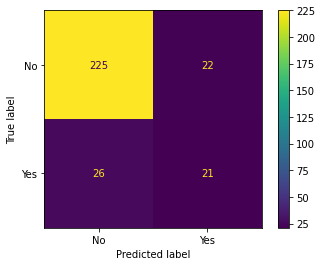

In [72]:
X_train_scaled_sampled, y_train_sampled = modeling(data_rf, scaler = StandardScaler(), 
                                                   model = RandomForestClassifier(n_estimators=100, 
                                                                                  criterion='entropy', 
                                                                                  max_depth=4, 
                                                                                  min_samples_split=100, 
                                                                                  min_samples_leaf=2, 
                                                                                  random_state=42, 
                                                                                  class_weight='balanced_subsample'))

In [73]:
#Hyperparameter Tuning: Random Forest

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_depth = [int(x) for x in np.linspace(1,10,10)]
criterion = ['gini','entropy']
min_samples_split = [2,5,7,10]
min_samples_leaf = [2,5,8]
max_features = ["auto","sqrt"]

random_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion,
                  min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,
                   max_features=max_features)

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 5, 7, 10], 'min_samples_leaf': [2, 5, 8], 'max_features': ['auto', 'sqrt']}


In [74]:
rf_clf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf_clf, param_distributions=random_grid, cv=5, n_iter=10,
                               random_state=42, n_jobs=-1, verbose=1,)

rf_random.fit(X_train_scaled_sampled, y_train_sampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   33.3s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 8],
                                        'min_samples_split': [2, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=1)

In [75]:
print("best score: ", rf_random.best_score_)
print("best parameter: ", rf_random.best_params_)

best score:  0.9313844564504195
best parameter:  {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 9, 'criterion': 'entropy'}


TomekLinks -----  before:  1176 | after:  1137
SMOTE      -----  before:  1137 | after:  1894
---------------------------------------------
RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       n_estimators=700)
---------------------------------------------
Accuracy of the TRAIN set      =  0.99
Cohen's kappa of the TRAIN set =  0.98
------------------- TRAIN -------------------
              precision    recall  f1-score   support

          No       0.98      1.00      0.99       947
         Yes       1.00      0.98      0.99       947

    accuracy                           0.99      1894
   macro avg       0.99      0.99      0.99      1894
weighted avg       0.99      0.99      0.99      1894

---------------------------------------------
Accuracy of the TEST set      =  0.87
Cohen's kappa of the TEST set =  0.38
------------------- TEST --------------------
              precision    recall  f1-score   support

          No       0.

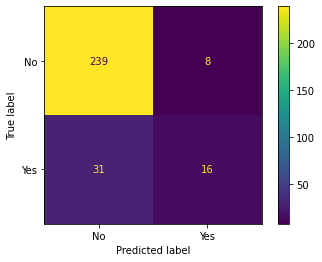

In [76]:
X_train_scaled_sampled, y_train_sampled = modeling(data_rf, scaler = StandardScaler(), 
                                                   model = RandomForestClassifier(n_estimators=700,
                                                                                  criterion='entropy', 
                                                                                  max_depth=10, 
                                                                                  min_samples_split=2, 
                                                                                  min_samples_leaf=2, 
                                                                                  max_features='auto'))

In [77]:
data_rf1 = data_final.copy()
data_rf1 = data_rf1.drop(['EducationField_Other', 
                          'EducationField_Human Resources', 
                          'Department_Human Resources', 
                          'PerformanceRating'], axis=1)

TomekLinks -----  before:  1176 | after:  1135
SMOTE      -----  before:  1135 | after:  1890
---------------------------------------------
RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       n_estimators=700)
---------------------------------------------
Accuracy of the TRAIN set      =  0.99
Cohen's kappa of the TRAIN set =  0.99
------------------- TRAIN -------------------
              precision    recall  f1-score   support

          No       0.99      1.00      0.99       945
         Yes       1.00      0.99      0.99       945

    accuracy                           0.99      1890
   macro avg       0.99      0.99      0.99      1890
weighted avg       0.99      0.99      0.99      1890

---------------------------------------------
Accuracy of the TEST set      =  0.86
Cohen's kappa of the TEST set =  0.38
------------------- TEST --------------------
              precision    recall  f1-score   support

          No       0.

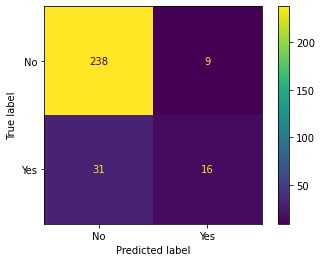

In [78]:
X_train_scaled_sampled, y_train_sampled = modeling(data_rf1, scaler = StandardScaler(), 
                                                   model = RandomForestClassifier(n_estimators=700,
                                                                                  criterion='entropy', 
                                                                                  max_depth=10, 
                                                                                  min_samples_split=2, 
                                                                                  min_samples_leaf=2, 
                                                                                  max_features='auto'))

### Ada Boost Classifier

In [79]:
data_ada = data_final.copy()

TomekLinks -----  before:  1176 | after:  1137
SMOTE      -----  before:  1137 | after:  1894
---------------------------------------------
AdaBoostClassifier(n_estimators=100)
---------------------------------------------
Accuracy of the TRAIN set      =  0.94
Cohen's kappa of the TRAIN set =  0.89
------------------- TRAIN -------------------
              precision    recall  f1-score   support

          No       0.94      0.95      0.94       947
         Yes       0.95      0.94      0.94       947

    accuracy                           0.94      1894
   macro avg       0.94      0.94      0.94      1894
weighted avg       0.94      0.94      0.94      1894

---------------------------------------------
Accuracy of the TEST set      =  0.83
Cohen's kappa of the TEST set =  0.42
------------------- TEST --------------------
              precision    recall  f1-score   support

          No       0.92      0.88      0.90       247
         Yes       0.47      0.57      0.52      

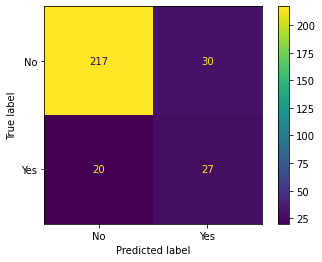

In [80]:
X_train_scaled_sampled, y_train_sampled = modeling(data_ada, scaler = StandardScaler(), 
                                                   model = AdaBoostClassifier(n_estimators=100))

In [81]:
#Hyperparameter Tuning: AdaBoost Classifier

n_estimators = [int(x) for x in np.linspace(50,500,10)]
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
algorithm = ['SAMME', 'SAMME.R']

ab_grid = dict(n_estimators=n_estimators, learning_rate=learning_rate, algorithm=algorithm)

print(ab_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'algorithm': ['SAMME', 'SAMME.R']}


In [82]:
ab = AdaBoostClassifier()
ab_random = RandomizedSearchCV(ab, param_distributions=ab_grid, cv=5, random_state=42,
                               n_iter=10, n_jobs=-1, verbose=1)

ab_random.fit(X_train_scaled_sampled, y_train_sampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.3s finished


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=42, verbose=1)

In [83]:
print("best score: ",ab_random.best_score_)
print("best parameter: ",ab_random.best_params_)

best score:  0.8923091957392748
best parameter:  {'n_estimators': 300, 'learning_rate': 0.2, 'algorithm': 'SAMME'}


TomekLinks -----  before:  1176 | after:  1137
SMOTE      -----  before:  1137 | after:  1894
---------------------------------------------
AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=300,
                   random_state=100)
---------------------------------------------
Accuracy of the TRAIN set      =  0.96
Cohen's kappa of the TRAIN set =  0.91
------------------- TRAIN -------------------
              precision    recall  f1-score   support

          No       0.94      0.97      0.96       947
         Yes       0.97      0.94      0.95       947

    accuracy                           0.96      1894
   macro avg       0.96      0.96      0.96      1894
weighted avg       0.96      0.96      0.96      1894

---------------------------------------------
Accuracy of the TEST set      =  0.86
Cohen's kappa of the TEST set =  0.48
------------------- TEST --------------------
              precision    recall  f1-score   support

          No       0.92      0

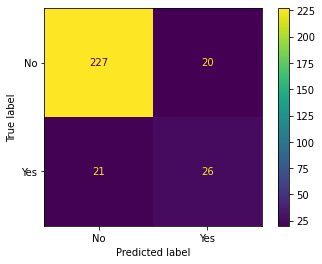

In [84]:
X_train_scaled_sampled, y_train_sampled = modeling(data_ada, scaler = StandardScaler(), 
                                                   model = AdaBoostClassifier(n_estimators=300, 
                                                                              learning_rate=1,
                                                                              algorithm='SAMME',
                                                                              random_state=100))

### XGBoost Classifier

In [85]:
data_xg = data_final.copy()

TomekLinks -----  before:  1176 | after:  1137
SMOTE      -----  before:  1137 | after:  1894
---------------------------------------------
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
---------------------------------------------
[12:51:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

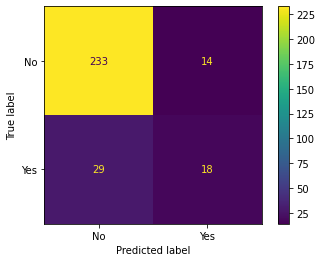

In [86]:
X_train_scaled_sampled, y_train_sampled = modeling(data_xg, scaler = StandardScaler(), 
                                                   model = XGBClassifier(n_estimators=100))

In [87]:
#Hyperparameter Tuning: XGBoost Classifier

n_estimators = [int(x) for x in np.linspace(100,1000,10)]

max_depth = [int(x) for x in np.linspace(6,30,5)]
learning_rate = [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]
min_child_weight = list(range(1,10))

xg_grid = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, 
               min_child_weight=min_child_weight)

print(xg_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_depth': [6, 12, 18, 24, 30], 'learning_rate': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9]}


In [88]:
xgb = XGBClassifier()
xgb_random = RandomizedSearchCV(xgb, param_distributions=xg_grid, cv=5, random_state=42,
                               n_iter=10, scoring="accuracy", n_jobs=-1, verbose=1)

xgb_random.fit(X_train_scaled_sampled, y_train_sampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   44.0s finished


[12:52:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [89]:
print("best score: ",xgb_random.best_score_)
print("best parameter: ",xgb_random.best_params_)

best score:  0.9039214865072385
best parameter:  {'n_estimators': 700, 'min_child_weight': 2, 'max_depth': 6, 'learning_rate': 0.002}


TomekLinks -----  before:  1176 | after:  1137
SMOTE      -----  before:  1137 | after:  1894
---------------------------------------------
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=10,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=700, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
---------------------------------------------
[12:52:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'bin

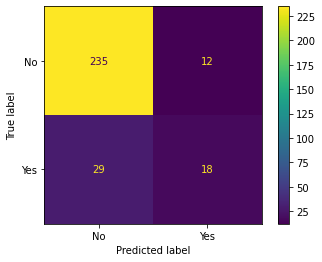

In [90]:
X_train_scaled_sampled, y_train_sampled = modeling(data_xg, scaler = StandardScaler(), 
                                                   model = XGBClassifier(n_estimators=700, 
                                                                         learning_rate=0.01, 
                                                                         max_depth=10, 
                                                                         min_child_weight=2))